## Import libraries

In [1]:
from pycocotools.coco import COCO
import os, sys, zipfile
import shutil
import urllib.request
import requests
import skimage.io as io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Record packeage versions for reproducibility

In [2]:
print("os: {}".format(os.name))
print("sys: {}".format(sys.version))
print("numpy: {}, {}".format(np.__version__, np.__file__))

os: nt
sys: 3.8.1 (default, Jan  8 2020, 15:55:49) [MSC v.1916 64 bit (AMD64)]
numpy: 1.18.1, C:\Users\bluep\Anaconda3\envs\capstone\lib\site-packages\numpy\__init__.py


## Setup data paths

In [3]:
dataDir = '..'
dataType = 'val2017'
annDir = '{}/annotations'.format(dataDir)
annZipFile = '{}/annotations_train{}.zip'.format(dataDir, dataType)
annFile = '{}/instances_{}.json'.format(annDir, dataType)
annURL = 'http://images.cocodataset.org/annotations/annotations_train{}.zip'.format(dataType)
print(annDir)
print(annFile)
print(annZipFile)
print(annURL)

../annotations
../annotations/instances_val2017.json
../annotations_trainval2017.zip
http://images.cocodataset.org/annotations/annotations_trainval2017.zip


## Download data if not available locally

In [4]:
if not os.path.exists(annDir):
    os.makedirs(annDir)
if not os.path.exists(annFile):
    if not os.path.exists(annZipFile):
        print("Downloading zipped annotations to " + annZipFile + " ...")
        with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
            shutil.copyfileobj(resp, out)
        print("... done downloading")
    print("Unzipping " + annZipFile)
    with zipfile.ZipFile(annZipFile, "r") as zip_ref:
        zip_ref.extractall(dataDir)
    print("... done unzipping")
print("will use annotations in " + annFile)

will use annotations in ../annotations/instances_val2017.json


## Initialize COCO API for instance annotations

In [5]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


## Display COCO categories and supercategories

In [6]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor animal electronic indoor food furniture person kitchen accessory vehicle sports appliance


##  Get all images containing given categories, for an example

In [7]:
catIds = coco.getCatIds(catNms=['person', 'dog', 'skateboard'])
imgIds = coco.getImgIds(catIds=catIds)
imgs = coco.loadImgs(imgIds)

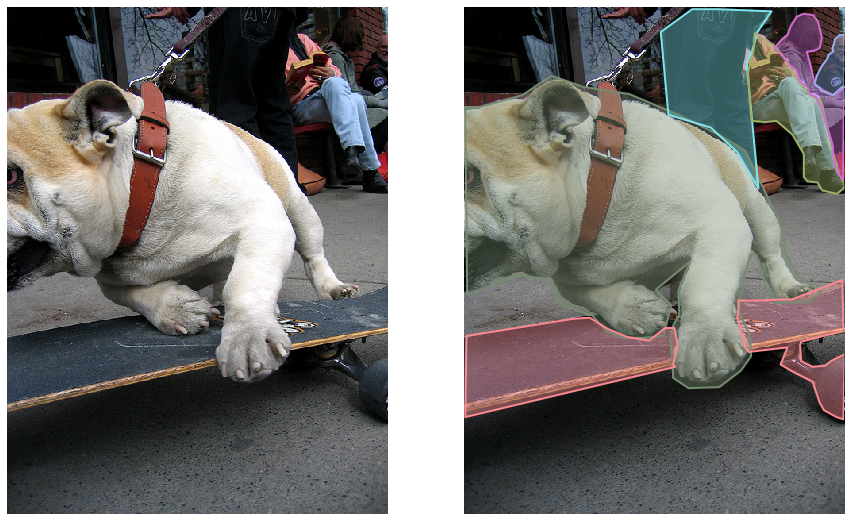

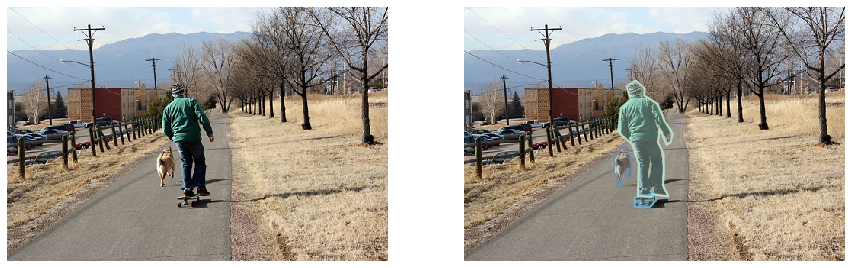

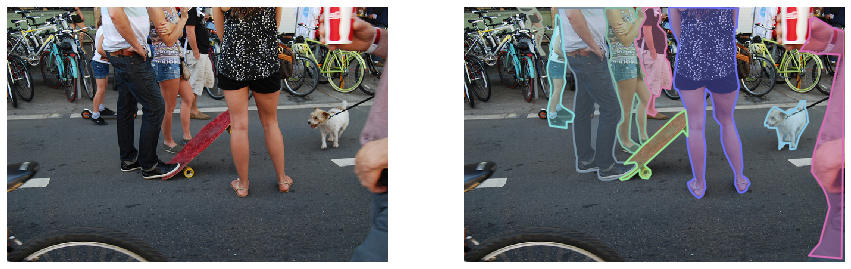

In [8]:
for img in imgs:
    I = io.imread(img['coco_url'])
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 15))
    ax1.axis('off')
    ax1.imshow(I) 
    ax2.axis('off')
    ax2.imshow(I)    
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
plt.show()

## Download 2017 validation images for simplicity
A size of training images is too large for data exploration

In [ ]:
# catIds = coco.getCatIds()
imgIds = coco.getImgIds()
imgs = coco.loadImgs(imgIds)
imgType = 'val2017'
imgDir = '../downloaded_images_{}/'.format(imgType)
if not os.path.exists(imgDir):
    os.makedirs(imgDir)
    for im in imgs:
        img_data = requests.get(im['coco_url']).content
        with open(imgDir + im['file_name'], 'wb') as handler:
            handler.write(img_data)